# Rimac Data Science Challenge Notebook 
### [Ana Paula Rojas](https://www.linkedin.com/in/ana-paula-rojas-939407137/), [Alfredo de la Fuente](https://www.linkedin.com/in/alfredodelafuenteb/)

## Indice

- *Descripción del Problema*
- *Preparacion de la Data*
- *Análisis Exploratorio*
- *Modelamiento*
- *Evaluación de Resultados*

##  Descripción del Problema

*** 

**Cual es la probabilidad que un cliente que NO tiene deuda en diciembre del 2016, tenga alguna deuda en enero del 2017?**


We get for each user in data the following features:
- **ID_UNICO**: 
- **CUC**: 
- **NSE_RIMAC**: Nivel Socioeconomico
- **NUM_PRODUCTOS**: Numero de productos en Rimac
- **SEGMENTO_INTERNO**: Clasifiicación del Cliente
- **OK**: Porcentaje de obligaciones OK
- **CPP**: Porcentaje de obligaciones Cuenas por pagar
- **DEFICIENTE**: Porcentaje de obligaciones Deficientes
- **DUDOSO**: POrcentaje de obligaciones Dudosas
- **PERDIDA**: Porcentaje de obligaciones en Perdida
- ** DEUDA_HIINI**: Deuda inicial
- **SALDO_SBS**: Suma total de deudas
- **SALDO_TC_SBS**: Deuda tarjetas de credito
- **SALDO_VEH_SBS**: Deuda vehicular
- **SALDO_HIP_SBS**: Deuda credito hipotecarios
- **SALDO_PP_SBS**: Deuda préstamos personales
- **SALDO_MICRO_SBS**: Deuda créditos microempresa
- **SALDO_PEQUENA_SBS**: Deuda credito pequeña empresa
- **SALDO_OTROS**: Saldo deuda en otras instituciones
- **PRIMA_TOTAL**: Monto total de PRIMAS RIMAC
- **PRIMA**: Monto de prima vehicular
- **CANALDES**: Canal de ventas del seguro vehicular
- **CLASEVEHDES**: Clase de vehiculo
- **MARCAVEHDES**: Marca del vehículo
- **USOVEHDES**: Uso del vehiculo
- **ANOFABRIC**: Año de fabricación
- **SUMASEG**: Suma contratada del seguro vehicular
- **NRO_SINIESTROS**: Numero de Siniestros
- **MTO_SINIESTROS**: Monto de Siniestros
- **SEXO**: Sexo del cliente
- **FEC_NACIMIENTO**: Fecha de nacimiento
- **UBICACION**: Agrupación del lugar donde se encuentra el cliente
- **DEPARTAMENTO**: Departamento donde se encuentra el cliente
- **UBIGEO**: Ubigeo donde se encuentra el cliente
- **NUM_FACTURAS**: Numero de facturas de mora
- **MONTO_DOLARES**: Monto que adeuda
- **TIPCASO.RN_DESCRIPTOR**: Tipo de interaccion que se realizo con el cliente.

El problema de ***Clasificacion** es bastante desbalanceado y la evaluación de la predicción se hará usando la curva 

## Librerias
*** 

In [2]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve

/home/alfredo/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/alfredo/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/alfredo/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0

## Preparacion de la data
*** 

In [3]:
training_data = pd.read_csv("Train2.csv") 
test_data = pd.read_csv("Test2.csv")

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45953 entries, 0 to 45952
Data columns (total 45 columns):
CUC                      45953 non-null object
ID_UNICO                 45953 non-null object
TARGET_FINAL             45953 non-null int64
SEXO                     44282 non-null object
FEC_NACIMIENTO           44220 non-null object
UBICACION                44364 non-null object
DEPARTAMENTO             44369 non-null object
INTERAC_VEH_TIPO         7517 non-null object
INTERAC_VEH_NUM          45953 non-null int64
INTERAC_NOVEH_TIPO       2728 non-null object
INTERAC_NOVEH_NUM        45953 non-null int64
PERIODO                  45953 non-null int64
NSE_RIMAC                43774 non-null object
NUM_PRODUCTOS            45936 non-null float64
SEGMENTO_INTERNO         45936 non-null object
OK                       40440 non-null float64
CPP                      40440 non-null float64
DEFICIENTE               40440 non-null float64
DUDOSO                   40440 non-null float64

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47499 entries, 0 to 47498
Data columns (total 45 columns):
ID_UNICO                 47499 non-null object
PROBA                    0 non-null float64
CUC                      47499 non-null object
SEXO                     45788 non-null object
FEC_NACIMIENTO           45724 non-null object
UBICACION                45892 non-null object
DEPARTAMENTO             45896 non-null object
INTERAC_VEH_TIPO         7914 non-null object
INTERAC_VEH_NUM          47499 non-null int64
INTERAC_NOVEH_TIPO       3024 non-null object
INTERAC_NOVEH_NUM        47499 non-null int64
PERIODO                  47499 non-null int64
NSE_RIMAC                45193 non-null object
NUM_PRODUCTOS            47491 non-null float64
SEGMENTO_INTERNO         47491 non-null object
OK                       41828 non-null float64
CPP                      41828 non-null float64
DEFICIENTE               41828 non-null float64
DUDOSO                   41828 non-null float64
P

In [7]:
#Count variables with missing values in TRAINING data
training_data.apply(lambda x: sum(x.isnull()),axis=0) 

CUC                          0
ID_UNICO                     0
TARGET_FINAL                 0
SEXO                      1671
FEC_NACIMIENTO            1733
UBICACION                 1589
DEPARTAMENTO              1584
INTERAC_VEH_TIPO         38436
INTERAC_VEH_NUM              0
INTERAC_NOVEH_TIPO       43225
INTERAC_NOVEH_NUM            0
PERIODO                      0
NSE_RIMAC                 2179
NUM_PRODUCTOS               17
SEGMENTO_INTERNO            17
OK                        5513
CPP                       5513
DEFICIENTE                5513
DUDOSO                    5513
PERDIDA                   5513
DEUDA_HIINI               5513
SALDO_SBS                 5513
SALDO_TC_SBS              5513
SALDO_VEH_SBS             5513
SALDO_HIP_SBS             5513
SALDO_PP_SBS              5513
SALDO_MICRO_SBS           5513
SALDO_PEQUENA_SBS         5513
SALDO_OTROS               5513
PRIMA_TOTAL                  0
PRIMA                        0
CANALDES                     2
CLASEVEH

In [8]:
#Count variables with missing values in TEST data
test_data.apply(lambda x: sum(x.isnull()),axis=0)

ID_UNICO                     0
PROBA                    47499
CUC                          0
SEXO                      1711
FEC_NACIMIENTO            1775
UBICACION                 1607
DEPARTAMENTO              1603
INTERAC_VEH_TIPO         39585
INTERAC_VEH_NUM              0
INTERAC_NOVEH_TIPO       44475
INTERAC_NOVEH_NUM            0
PERIODO                      0
NSE_RIMAC                 2306
NUM_PRODUCTOS                8
SEGMENTO_INTERNO             8
OK                        5671
CPP                       5671
DEFICIENTE                5671
DUDOSO                    5671
PERDIDA                   5671
DEUDA_HIINI               5671
SALDO_SBS                 5671
SALDO_TC_SBS              5671
SALDO_VEH_SBS             5671
SALDO_HIP_SBS             5671
SALDO_PP_SBS              5671
SALDO_MICRO_SBS           5671
SALDO_PEQUENA_SBS         5671
SALDO_OTROS               5671
PRIMA_TOTAL                  0
PRIMA                        0
CANALDES                     2
CLASEVEH

In [9]:
training_data.head()

,CUC,ID_UNICO,TARGET_FINAL,SEXO,FEC_NACIMIENTO,UBICACION,DEPARTAMENTO,INTERAC_VEH_TIPO,INTERAC_VEH_NUM,INTERAC_NOVEH_TIPO,...,ANOFABRIC,SUMASEG,NRO_SINIESTROS,MTO_SINIESTROS,FECHA_INICIO,NUM_FACTURAS_HIST,NUM_FACTURAS_HIST_TOT,MONTO_DOLARES_HIST,NUM_FACTURAS_UM,MONTO_FACTURAS_UM
0,4-33337735,4-33337735-E7T430,0,NaN,NaN,NaN,NaN,NaN,0,NaN,...,2006.0,7000.0,0,0.0,2016-02-01,0,0,0,0,0
1,4-33331791,4-33331791-I8K911,0,M,25/09/1963,LIMA TOP,LIMA,NaN,0,NaN,...,2013.0,22200.0,0,0.0,2016-07-01,0,0,0,0,0
2,4-33349816,4-33349816-I5P489,0,M,02/10/1964,LIMA TOP,LIMA,NaN,0,Requerimientos,...,2010.0,25000.0,0,0.0,2016-06-01,0,0,0,0,0
3,4-33368177,4-33368177-I7U825,0,F,15/11/1952,PERU CENTRO,JUNIN,NaN,0,NaN,...,2013.0,19000.0,0,0.0,2016-03-01,0,0,0,0,0
4,4-33373970,4-33373970-DSJ571,0,M,25/07/1957,LIMA TOP,LIMA,NaN,0,NaN,...,2015.0,18700.0,0,0.0,2016-05-01,0,0,0,0,0


In [10]:
test_data.head()

,ID_UNICO,PROBA,CUC,SEXO,FEC_NACIMIENTO,UBICACION,DEPARTAMENTO,INTERAC_VEH_TIPO,INTERAC_VEH_NUM,INTERAC_NOVEH_TIPO,...,ANOFABRIC,SUMASEG,NRO_SINIESTROS,MTO_SINIESTROS,FECHA_INICIO,NUM_FACTURAS_HIST,NUM_FACTURAS_HIST_TOT,MONTO_DOLARES_HIST,NUM_FACTURAS_UM,MONTO_FACTURAS_UM
0,4-33337735-E7T430,NaN,4-33337735,NaN,NaN,NaN,NaN,NaN,0,NaN,...,2006.0,7000.0,0,0.00,2016-02-01,0,0,0,0,0
1,4-33331791-I8K911,NaN,4-33331791,M,25/09/1963,LIMA TOP,LIMA,NaN,0,NaN,...,2013.0,22200.0,0,0.00,2016-07-01,0,0,0,0,0
2,4-33349816-I5P489,NaN,4-33349816,M,02/10/1964,LIMA TOP,LIMA,NaN,0,NaN,...,2010.0,25000.0,0,0.00,2016-06-01,0,0,0,0,0
3,4-33368177-I7U825,NaN,4-33368177,F,15/11/1952,PERU CENTRO,JUNIN,Requerimientos,4,NaN,...,2013.0,19000.0,1,1067.88,2016-03-01,0,0,0,0,0
4,4-33373970-DSJ571,NaN,4-33373970,M,25/07/1957,LIMA TOP,LIMA,NaN,0,NaN,...,2015.0,18700.0,0,0.00,2016-05-01,0,0,0,0,0


En las variables OK, CPP, DEFICIENTE, DUDOSO, PERDIDA, DEUDA_HIINI, SALDO_SBS, SALDO_TC_SBS, SALDO_VEH_SBS, SALDO_HIP_SBS, SALDO_PP_SBS, SALDO_MICRO_SBS, SALDO_PEQUENA_SBS, SALDO_OTROS reemplazamos los NaN con 0.     

In [11]:
training_data['OK'].fillna(0, inplace = True)
test_data['OK'].fillna(0, inplace = True)
training_data['CPP'].fillna(0, inplace = True)
test_data['CPP'].fillna(0, inplace = True)
training_data['DEFICIENTE'].fillna(0, inplace = True)
test_data['DEFICIENTE'].fillna(0, inplace = True)
training_data['DUDOSO'].fillna(0, inplace = True)
test_data['DUDOSO'].fillna(0, inplace = True)
training_data['PERDIDA'].fillna(0, inplace = True)
test_data['PERDIDA'].fillna(0, inplace = True)
training_data['DEUDA_HIINI'].fillna(0, inplace = True)
test_data['DEUDA_HIINI'].fillna(0, inplace = True)
training_data['SALDO_SBS'].fillna(0, inplace = True)
test_data['SALDO_SBS'].fillna(0, inplace = True)
training_data['SALDO_TC_SBS'].fillna(0, inplace = True)
test_data['SALDO_TC_SBS'].fillna(0, inplace = True)
training_data['SALDO_VEH_SBS'].fillna(0, inplace = True)
test_data['SALDO_VEH_SBS'].fillna(0, inplace = True)
training_data['SALDO_HIP_SBS'].fillna(0, inplace = True)
test_data['SALDO_HIP_SBS'].fillna(0, inplace = True)
training_data['SALDO_PP_SBS'].fillna(0, inplace = True)
test_data['SALDO_PP_SBS'].fillna(0, inplace = True)
training_data['SALDO_MICRO_SBS'].fillna(0, inplace = True)
test_data['SALDO_MICRO_SBS'].fillna(0, inplace = True)
training_data['SALDO_PEQUENA_SBS'].fillna(0, inplace = True)
test_data['SALDO_PEQUENA_SBS'].fillna(0, inplace = True)
training_data['SALDO_OTROS'].fillna(0, inplace = True)
test_data['SALDO_OTROS'].fillna(0, inplace = True)
training_data['NUM_PRODUCTOS'].fillna(0, inplace = True)
test_data['NUM_PRODUCTOS'].fillna(0, inplace = True)
training_data['SUMASEG'].fillna(0, inplace = True)
test_data['SUMASEG'].fillna(0, inplace = True)

Crear clases para las variables categoricas

In [13]:
# Create label enconding
le = preprocessing.LabelEncoder()
training_data['SEXO']= le.fit_transform(training_data['SEXO'])
test_data['SEXO']= le.fit_transform(test_data['SEXO'])
training_data['UBICACION']= le.fit_transform(training_data['UBICACION'])
test_data['UBICACION']= le.fit_transform(test_data['UBICACION'])
training_data['DEPARTAMENTO']= le.fit_transform(training_data['DEPARTAMENTO'])
test_data['DEPARTAMENTO']= le.fit_transform(test_data['DEPARTAMENTO'])
training_data['CANALDES']= le.fit_transform(training_data['CANALDES'])
test_data['CANALDES']= le.fit_transform(test_data['CANALDES'])
training_data['CANALDES']= le.fit_transform(training_data['CANALDES'])
test_data['CANALDES']= le.fit_transform(test_data['CANALDES'])
training_data['NSE_RIMAC']= le.fit_transform(training_data['NSE_RIMAC'])
test_data['NSE_RIMAC']= le.fit_transform(test_data['NSE_RIMAC'])
training_data['SEGMENTO_INTERNO']= le.fit_transform(training_data['SEGMENTO_INTERNO'])
test_data['SEGMENTO_INTERNO']= le.fit_transform(test_data['SEGMENTO_INTERNO'])
training_data['CLASEVEHDES']= le.fit_transform(training_data['CLASEVEHDES'])
test_data['CLASEVEHDES']= le.fit_transform(test_data['CLASEVEHDES'])
training_data['USOVEHDES']= le.fit_transform(training_data['USOVEHDES'])
test_data['USOVEHDES']= le.fit_transform(test_data['USOVEHDES'])
training_data['INTERAC_VEH_TIPO']= le.fit_transform(training_data['INTERAC_VEH_TIPO'])
test_data['INTERAC_VEH_TIPO']= le.fit_transform(test_data['INTERAC_VEH_TIPO'])
training_data['INTERAC_NOVEH_TIPO']= le.fit_transform(training_data['INTERAC_NOVEH_TIPO'])
test_data['INTERAC_NOVEH_TIPO']= le.fit_transform(test_data['INTERAC_NOVEH_TIPO'])

Lidiamos con data en formato de fechas

In [14]:
training_data['FEC_NACIMIENTO'] = pd.to_datetime(training_data['FEC_NACIMIENTO'])    
training_data['EDAD'] = ( pd.to_datetime('2016-11-01') - training_data['FEC_NACIMIENTO'] ) / np.timedelta64(1,'Y')
test_data['FEC_NACIMIENTO'] = pd.to_datetime(test_data['FEC_NACIMIENTO'])    
test_data['EDAD'] = ( pd.to_datetime('2016-11-01') - test_data['FEC_NACIMIENTO'] ) / np.timedelta64(1,'Y')

training_data['ANOFABRIC'] = 2017 - training_data['ANOFABRIC']
test_data['ANOFABRIC'] = 2017 - test_data['ANOFABRIC']

training_data['FECHA_INICIO'] = pd.to_datetime(training_data['FECHA_INICIO'])    
training_data['TIEMPO_PRODUCTO'] = ( pd.to_datetime('2016-11-01') - training_data['FECHA_INICIO'] ) / np.timedelta64(1,'M')
test_data['FEC_NACIMIENTO'] = pd.to_datetime(test_data['FECHA_INICIO'])    
test_data['TIEMPO_PRODUCTO'] = ( pd.to_datetime('2016-11-01') - test_data['FEC_NACIMIENTO'] ) / np.timedelta64(1,'M')

In [15]:
#Count variables with missing values in TRAINING data
training_data.apply(lambda x: sum(x.isnull()),axis=0) 

CUC                         0
ID_UNICO                    0
TARGET_FINAL                0
SEXO                        0
FEC_NACIMIENTO           1733
UBICACION                   0
DEPARTAMENTO                0
INTERAC_VEH_TIPO            0
INTERAC_VEH_NUM             0
INTERAC_NOVEH_TIPO          0
INTERAC_NOVEH_NUM           0
PERIODO                     0
NSE_RIMAC                   0
NUM_PRODUCTOS               0
SEGMENTO_INTERNO            0
OK                          0
CPP                         0
DEFICIENTE                  0
DUDOSO                      0
PERDIDA                     0
DEUDA_HIINI                 0
SALDO_SBS                   0
SALDO_TC_SBS                0
SALDO_VEH_SBS               0
SALDO_HIP_SBS               0
SALDO_PP_SBS                0
SALDO_MICRO_SBS             0
SALDO_PEQUENA_SBS           0
SALDO_OTROS                 0
PRIMA_TOTAL                 0
PRIMA                       0
CANALDES                    0
CLASEVEHDES                 0
MARCAVEHDE

Eliminar variables que no consideraremos.

In [16]:
training_data = training_data.drop(['CUC','ID_UNICO','PERIODO','MARCAVEHDES','FEC_NACIMIENTO','FECHA_INICIO'], axis = 1)
test_data = test_data.drop(['CUC','PERIODO','MARCAVEHDES','FEC_NACIMIENTO','FECHA_INICIO'], axis = 1 )

In [17]:
#Count variables with missing values in TRAINING data
training_data.apply(lambda x: sum(x.isnull()),axis=0) 

TARGET_FINAL                0
SEXO                        0
UBICACION                   0
DEPARTAMENTO                0
INTERAC_VEH_TIPO            0
INTERAC_VEH_NUM             0
INTERAC_NOVEH_TIPO          0
INTERAC_NOVEH_NUM           0
NSE_RIMAC                   0
NUM_PRODUCTOS               0
SEGMENTO_INTERNO            0
OK                          0
CPP                         0
DEFICIENTE                  0
DUDOSO                      0
PERDIDA                     0
DEUDA_HIINI                 0
SALDO_SBS                   0
SALDO_TC_SBS                0
SALDO_VEH_SBS               0
SALDO_HIP_SBS               0
SALDO_PP_SBS                0
SALDO_MICRO_SBS             0
SALDO_PEQUENA_SBS           0
SALDO_OTROS                 0
PRIMA_TOTAL                 0
PRIMA                       0
CANALDES                    0
CLASEVEHDES                 0
USOVEHDES                   0
ANOFABRIC                  17
SUMASEG                     0
NRO_SINIESTROS              0
MTO_SINIES

In [18]:
#Count variables with missing values in TEST data
test_data.apply(lambda x: sum(x.isnull()),axis=0) 

ID_UNICO                     0
PROBA                    47499
SEXO                         0
UBICACION                    0
DEPARTAMENTO                 0
INTERAC_VEH_TIPO             0
INTERAC_VEH_NUM              0
INTERAC_NOVEH_TIPO           0
INTERAC_NOVEH_NUM            0
NSE_RIMAC                    0
NUM_PRODUCTOS                0
SEGMENTO_INTERNO             0
OK                           0
CPP                          0
DEFICIENTE                   0
DUDOSO                       0
PERDIDA                      0
DEUDA_HIINI                  0
SALDO_SBS                    0
SALDO_TC_SBS                 0
SALDO_VEH_SBS                0
SALDO_HIP_SBS                0
SALDO_PP_SBS                 0
SALDO_MICRO_SBS              0
SALDO_PEQUENA_SBS            0
SALDO_OTROS                  0
PRIMA_TOTAL                  0
PRIMA                        0
CANALDES                     0
CLASEVEHDES                  0
USOVEHDES                    0
ANOFABRIC                   18
SUMASEG 

In [19]:
list(test_data)

['ID_UNICO',
 'PROBA',
 'SEXO',
 'UBICACION',
 'DEPARTAMENTO',
 'INTERAC_VEH_TIPO',
 'INTERAC_VEH_NUM',
 'INTERAC_NOVEH_TIPO',
 'INTERAC_NOVEH_NUM',
 'NSE_RIMAC',
 'NUM_PRODUCTOS',
 'SEGMENTO_INTERNO',
 'OK',
 'CPP',
 'DEFICIENTE',
 'DUDOSO',
 'PERDIDA',
 'DEUDA_HIINI',
 'SALDO_SBS',
 'SALDO_TC_SBS',
 'SALDO_VEH_SBS',
 'SALDO_HIP_SBS',
 'SALDO_PP_SBS',
 'SALDO_MICRO_SBS',
 'SALDO_PEQUENA_SBS',
 'SALDO_OTROS',
 'PRIMA_TOTAL',
 'PRIMA',
 'CANALDES',
 'CLASEVEHDES',
 'USOVEHDES',
 'ANOFABRIC',
 'SUMASEG',
 'NRO_SINIESTROS',
 'MTO_SINIESTROS',
 'NUM_FACTURAS_HIST',
 'NUM_FACTURAS_HIST_TOT',
 'MONTO_DOLARES_HIST',
 'NUM_FACTURAS_UM',
 'MONTO_FACTURAS_UM',
 'EDAD',
 'TIEMPO_PRODUCTO']

In [20]:
# Store features and labels
feature_names = list(training_data)[1:]
X_train = training_data[feature_names].values 
y_train = training_data['TARGET_FINAL'].values 

X_test = test_data[list(test_data)[2:]].values
ID_UNI = test_data['ID_UNICO'].values
PROB = test_data['PROBA'].values

# Fill 'PE' missing values with mean
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [22]:
len(feature_names)

40

## Modelamiento
*** 


Cross Validation Training Report Summary
     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
97        0.865111      0.004024        0.908280       0.000713
98        0.865076      0.003963        0.908708       0.000697
99        0.865088      0.003819        0.909089       0.000680
100       0.865136      0.003820        0.909347       0.000680
101       0.865159      0.003750        0.909727       0.000802

Model Report
ROC_AUC : 0.746955


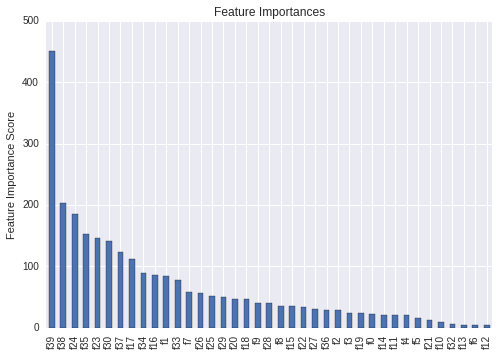

In [23]:
#Load preprocessed data
dtrain = xgb.DMatrix(X_train, y_train)

#Cross Validation parameters
cv_folds = 5 
rounds = 50 

# Proposed Initial Model
xgb1 = xgb.XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=5,
                         min_child_weight=1, gamma=0, subsample=0.8,
                         colsample_bytree=0.8,objective= 'binary:logistic',
                         nthread=4, scale_pos_weight=1, seed=27)

xgb_param_1 = xgb1.get_xgb_params()

cvresult = xgb.cv(xgb_param_1, dtrain, num_boost_round=xgb_param_1['n_estimators'], 
                  nfold=cv_folds, metrics='auc', early_stopping_rounds=rounds)

print "\nCross Validation Training Report Summary"
print cvresult.tail()

xgb1.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
xgb1.fit(X_train, y_train,eval_metric='auc')

#Predict training set:
dtrain_predictions_1 = xgb1.predict(X_train)
        
#Print model report:
print "\nModel Report"
print "ROC_AUC : %.6f" % ( roc_auc_score(y_train, dtrain_predictions_1)**0.5 )
                    
feat_imp = pd.Series(xgb1.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

## Prediccion
*** 

In [24]:
PROBA_FINAL = xgb1.predict_proba(X_test)

In [25]:
PROBA_FINAL

array([[ 0.99535823,  0.00464175],
       [ 0.97480565,  0.02519437],
       [ 0.9832564 ,  0.01674357],
       ..., 
       [ 0.98866755,  0.01133248],
       [ 0.91785395,  0.08214603],
       [ 0.90108252,  0.09891751]], dtype=float32)

In [26]:
len(PROBA_FINAL)

47499

In [27]:
# Save PREDICTION FILE
aux = pd.read_csv("Test1.csv")
aux['PROBA'] = PROBA_FINAL
aux = aux.drop(list(aux)[2:], axis = 1)
aux.to_csv('SUBMISSION_2_AA.csv')

In [28]:
aux

,ID_UNICO,PROBA
0,4-33337735-E7T430,0.995358
1,4-33331791-I8K911,0.974806
2,4-33349816-I5P489,0.983256
3,4-33368177-I7U825,0.986770
4,4-33373970-DSJ571,0.982088
5,4-33380006-UTX813,0.986587
6,4-33392271-I4A770,0.963043
7,4-33317867-G8I479,0.859989
8,4-33327626-DIV768,0.985796
9,4-33433832-KU49023569O,0.988999
